# Quantitative Analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from os import path
from PIL import Image

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Importing TextBlob
from textblob import TextBlob

# Importing VaderSentiment
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyzer = SentimentIntensityAnalyzer()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read csv
yt_comments_video = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/YouTube_video.csv")
yt_comments_shorts = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/YouTube_shorts.csv")
fb_comments_posts = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/Facebook_post.csv")
insta_comments_posts = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/Instagram_posts.csv")
insta_comments_reels = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/Instagram_reels.csv")
reddit_comments = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/Reddit_new.csv")
tiktok_comments = pd.read_csv("/content/drive/MyDrive/USYD/SCDL1991/SCDL 1991 Group 10 Folder/Comments Data/TikTok.csv")

platforms = {
    "Youtube_videos": yt_comments_video,
    "Youtube_shorts": yt_comments_shorts,
    "Facebook_posts": fb_comments_posts,
    "Instagram_posts": insta_comments_posts,
    "Instagram_reels": insta_comments_reels,
    "Reddit": reddit_comments,
    "TikTok": tiktok_comments
    }

## *Choose what platform to analyze here

In [ ]:
# "Youtube_videos", "Youtube_shorts", "Facebook_posts", "Instagram_posts", "Instagram_reels", "Reddit", "TikTok"
# comments = platforms["Facebook_posts"]
comments = pd.concat([yt_comments_video, yt_comments_shorts, fb_comments_posts, insta_comments_posts, insta_comments_reels, reddit_comments, tiktok_comments])
comments.reset_index(drop=True, inplace=True)

comments.head()
print(len(comments))

7411


In [ ]:
comments.dtypes

comment_author     object
comment_time       object
comment_likes     float64
comment_text       object
post_url           object
dtype: object

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comment_author  411 non-null    object 
 1   comment_time    411 non-null    object 
 2   comment_likes   411 non-null    float64
 3   comment_text    411 non-null    object 
 4   post_url        411 non-null    object 
dtypes: float64(1), object(4)
memory usage: 16.2+ KB


In [ ]:
comments.describe()

,comment_likes
count,411.000000
mean,1.182482
std,4.084269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,70.000000


Text(0.5, 1.0, 'Length of comments')

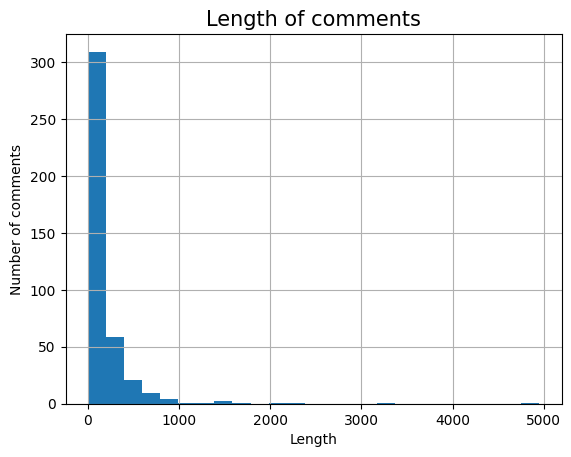

In [ ]:
# Let's see the length of the comments
seq_length = [len(i) for i in comments['comment_text']]

pd.Series(seq_length).hist(bins = 25)
plt.xlabel('Length')
plt.ylabel('Number of comments')
plt.title('Length of comments',fontsize=15)

In [ ]:
# A bit of cleaning

comments.text = comments.comment_text.str.replace('[#,@,&]', '')
comments.text = comments.text.str.replace('@[^\s]+','')
comments.text = comments.text.str.replace(' \d+ ','')
comments.text = comments.text.str.replace("http\S+", "")
comments.text = comments.text.str.replace('\s+', ' ')
comments.text = comments.text.str.replace(r'\s+[a-zA-Z]\s+', '')
print(len(comments))

7411


<ipython-input-49-ab1c07d8fcde>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  comments.text = comments.comment_text.str.replace('[#,@,&]', '')


## WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


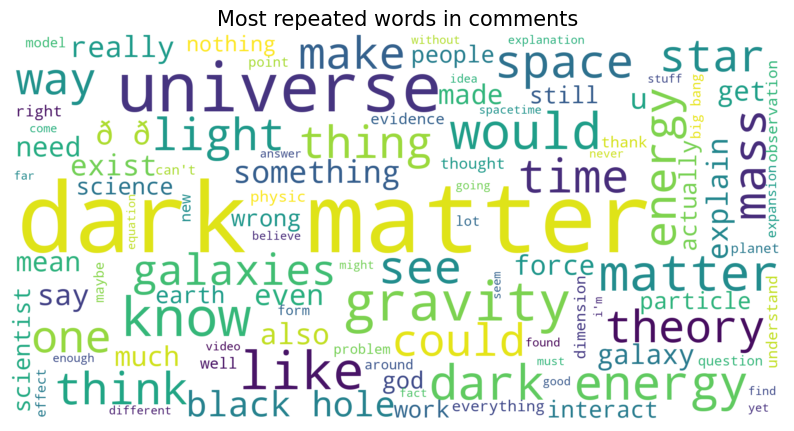

In [ ]:
# Get stopwords
# Define nltk stopwords in english
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = stopwords.words('english')
stop_words.extend(['ha', 'wa', '-'])

# Get a string of tweets
comment_text = ",".join(review.lower() for review in comments.text if 'covid' not in review)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      stopwords=stop_words,
                      scale=5,
                      background_color="white").generate(comment_text)

# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most repeated words in comments',fontsize=15)
plt.show()

## Word frequency lemmatized

Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.

In [ ]:
# lemmatize text column by using a lemmatize function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text.lower())]


# Initialize the Lemmatizer and Whitespace Tokenizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Lemmatize words
comments['lemmatized'] = comments.text.apply(lemmatize_text)
comments['lemmatized'] = comments['lemmatized'].apply(lambda x: [word for word in x if word not in stop_words])

# use explode to expand the lists into separate rows
wf_comments = comments.lemmatized.explode().to_frame().reset_index(drop=True)

# plot dfe
sns.countplot(x='lemmatized', data=wf_comments, order=wf_comments.lemmatized.value_counts().iloc[:10].index)
plt.title('Word frequency lemmatized',fontsize=15)
plt.xlabel('Most common used words')
plt.ylabel('Frequency [%]')
plt.xticks(rotation=70)


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## *Sentiment analysis with TextBlob

[TextBlob](https://textblob.readthedocs.io/en/dev/) is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Polarity scores are numerical values that range from -1 to 1, where -1 indicates a very negative sentiment, 0 indicates a neutral sentiment, and 1 indicates a very positive sentiment.

Subjectivity scores are numerical values that range from 0 to 1, where 0 indicates a very objective text, and 1 indicates a very subjective text. Objective texts are based on facts, evidence, or logic, while subjective texts are based on opinions, feelings, or personal views.

In [ ]:
# for platform, comments in platforms.items():
#     comments['polarity'] = comments.text.apply(lambda x: TextBlob(x).polarity)
#     comments['subjectivity'] = comments.text.apply(lambda x: TextBlob(x).subjectivity)

#     # Update the DataFrame in the dictionary
#     platforms[platform] = comments

comments['polarity'] = comments.text.apply(lambda x: TextBlob(x).polarity)
comments['subjectivity'] = comments.text.apply(lambda x: TextBlob(x).subjectivity)

comments.head()

,comment_author,comment_time,comment_likes,comment_text,post_url,polarity,subjectivity,sentiment,post_id
0,@mikilynne4558,2024-11-02 16:42:04,0.0,The incomprehensible distances between galaxies matches the same awe that billions of tons of matter can be condensed into infinite density.\nThe 2 anomalies are related. Find the key to open the door from one realm to the other and you can instantly go anywhere in the universe ... IF you don't obliterate all existence in doing so.\nGet that? I think I just confused myself!,https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,-0.089286,0.538095,negative,NaN
1,@ravencroft99,2024-11-01 14:01:03,0.0,"Could a particle moving faster than light have gravity? It there were things that are able to move faster than light, by definition, we wouldn't be able to see them right?",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.417143,0.637143,positive,NaN
2,@francishubertovasquez2139,2024-06-01 06:58:26,0.0,Dark Matter and Dark Energy are my footstool.,https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,-0.150000,0.400000,negative,NaN
3,@flyfishing739,2024-05-01 00:19:43,0.0,"The James Webb proves this is not true as huge galaxies we're in the ""dark age""",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.093750,0.487500,positive,NaN
4,@mt-qc2qh,2024-04-17 09:25:50,1.0,"Maybe they will finally hypothesize that the concept of ""Dark energy"" and it's influences is actually the gravitational influence of other ""universes"" in a much grander environment, each with their own ""big bang"" and expansions. Our ""universe"" is only what we can see, but now the JWST is seeing beyond that horizon and showing that we are even smaller and more insignificant thatn we thought.",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.102500,0.517500,positive,NaN


In TextBlob, based on the polarity and subjectivity, you determine whether it is a positive text or negative or neutral. For TextBlob, if  polarity is > 0, it is considered positive, if polarity < 0 is considered negative and if polarity == 0 is considered as neutral.

In [ ]:
# for platform, comments in platforms.items():
#   comments['sentiment'] = np.where(comments.polarity > 0, 'positive',
#                                  np.where(comments.polarity < 0, 'negative', 'neutral'))
#   platforms[platform] = comments

comments['sentiment'] = np.where(comments.polarity > 0, 'positive',
                                 np.where(comments.polarity < 0, 'negative', 'neutral'))
comments.head()

,comment_author,comment_time,comment_likes,comment_text,post_url,polarity,subjectivity,sentiment,post_id
0,@mikilynne4558,2024-11-02 16:42:04,0.0,The incomprehensible distances between galaxies matches the same awe that billions of tons of matter can be condensed into infinite density.\nThe 2 anomalies are related. Find the key to open the door from one realm to the other and you can instantly go anywhere in the universe ... IF you don't obliterate all existence in doing so.\nGet that? I think I just confused myself!,https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,-0.089286,0.538095,negative,NaN
1,@ravencroft99,2024-11-01 14:01:03,0.0,"Could a particle moving faster than light have gravity? It there were things that are able to move faster than light, by definition, we wouldn't be able to see them right?",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.417143,0.637143,positive,NaN
2,@francishubertovasquez2139,2024-06-01 06:58:26,0.0,Dark Matter and Dark Energy are my footstool.,https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,-0.150000,0.400000,negative,NaN
3,@flyfishing739,2024-05-01 00:19:43,0.0,"The James Webb proves this is not true as huge galaxies we're in the ""dark age""",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.093750,0.487500,positive,NaN
4,@mt-qc2qh,2024-04-17 09:25:50,1.0,"Maybe they will finally hypothesize that the concept of ""Dark energy"" and it's influences is actually the gravitational influence of other ""universes"" in a much grander environment, each with their own ""big bang"" and expansions. Our ""universe"" is only what we can see, but now the JWST is seeing beyond that horizon and showing that we are even smaller and more insignificant thatn we thought.",https://www.youtube.com/watch?v=uBbxXNhZ78c&pp=ygULZGFyayBtYXR0ZXI%3D,0.102500,0.517500,positive,NaN


In [ ]:
for platform, comments in platforms.items():
  comments['sentiment_subjectivity'] = np.where(comments.subjectivity > 0.5, 'subjective',
                                 np.where(comments.subjectivity < 0.5, 'objective', 'neutral'))
  platforms[platform] = comments

AttributeError: 'DataFrame' object has no attribute 'subjectivity'

In [ ]:
# Shows the top 5 tweets with highest polarity scores
pd.set_option('display.max_colwidth', None)
comments.nlargest(5,'polarity')['comment_text']

134    Even in 30 years of service Hubble space  talescope is still the best ðð
159                                                               Very beautiful ð
168                                       Moon very very beautiful is God fo gift pls
181                                 So awesome --- congrats Blake Crouch - can't wait
280                                              The Lord is the greatest! ???? ????!
Name: comment_text, dtype: object

In [ ]:
# Shows the top 5 tweets with highest subjectivity scores
pd.set_option('display.max_colwidth', None)
comments.nlargest(5,'subjectivity')['comment_text']

43                                                                                      Why is there no working model of the universe that takes rigid body rotation physics into account? Itâs impossible and doesnât work. 
44     They call it nothing because they have nothing to work from but it could be everything, and inspiring truth that for the moment is beyond the ego and it's ability to fathom...exciting indeed.  Time for the imagination!
48                                                                                                                                                   Just like inside trump brain, just a bunch of clutter! Sorry couldnt resist.
152                                                                                                                                                                                                 People still trust NASA? Wow!
159                                                                                             

In [ ]:
# Shows the top 5 tweets with lowest polarity scores
comments.nsmallest(5,'polarity')['comment_text']

110                                                                                                        The silly nonsense keeps on coming!!!
43     Why is there no working model of the universe that takes rigid body rotation physics into account? Itâs impossible and doesnât work. 
86                                       The Theory of Relatability has been broken for years! Ever see the movie Interstellar?? I rest my case!
31                                            Yet theyve never found it or proven its existence this is merely modeling, of the plasma universe.
48                                                                  Just like inside trump brain, just a bunch of clutter! Sorry couldnt resist.
Name: comment_text, dtype: object

In [ ]:
# Shows the top 5 tweets with lowest subjectivity scores
comments.nsmallest(5,'subjectivity')['comment_text']

2                                                    Yes Heaven is raised which no eyes had ever seen nor could one visualize.....
4     Your translation choices in the 21st century are helpful.  I wonder how the words might be translated in the 22nd century?  
8                                              Maybe "gravity" is caused by differences in the uniformity of space? Fractal maybe?
12                                                              Man thinks  he knows everthang.  He don't kno jack diddly squat...
13                                                                         Well if Infinity exists then compartmentalize that ð¤£
Name: comment_text, dtype: object

In [ ]:
# Shows the top 5 tweets with highest polarity and subjectivity scores
comments.nlargest(5, ['polarity', 'subjectivity'])['comment_text']

159                                  Very beautiful ð
168          Moon very very beautiful is God fo gift pls
181    So awesome --- congrats Blake Crouch - can't wait
280                 The Lord is the greatest! ???? ????!
361                               Awesome information !!
Name: comment_text, dtype: object

In [ ]:
# Shows the top 5 tweets with lowest polarity and subjectivity scores
comments.nsmallest(5, ['polarity', 'subjectivity'])['comment_text']

110                                                                                                        The silly nonsense keeps on coming!!!
43     Why is there no working model of the universe that takes rigid body rotation physics into account? Itâs impossible and doesnât work. 
86                                       The Theory of Relatability has been broken for years! Ever see the movie Interstellar?? I rest my case!
31                                            Yet theyve never found it or proven its existence this is merely modeling, of the plasma universe.
254                                                                                                                  Or maybe they got it wrong.
Name: comment_text, dtype: object

## EDA of Sentiment analysis result

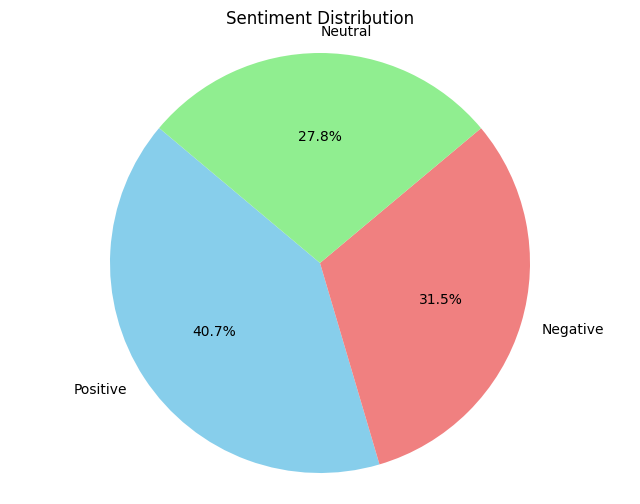

sentiment
positive    3015
negative    2336
neutral     2060
Name: count, dtype: int64

In [ ]:
positive_count = comments['sentiment'].value_counts().get('positive', 0)
negative_count = comments['sentiment'].value_counts().get('negative', 0)
neutral_count = comments['sentiment'].value_counts().get('neutral', 0)

# Data
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

comments['sentiment'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

pd.reset_option('display.max_colwidth')

# LabelBinarize sentiment column and merge with tweets DF
lb = LabelBinarizer()

sentbinarized = lb.fit_transform(comments['sentiment']).tolist()
#lb.classes_ # Classes of the LabelBinarizer

dfbinarized = pd.DataFrame(sentbinarized, columns=lb.classes_)
comments[dfbinarized.columns] = dfbinarized
comments.head()

,comment_author,comment_time,comment_text,post_id,polarity,subjectivity,sentiment,negative,neutral,positive
0,tea.moth13,2023-11-26 02:40:48,"dark matter is just somtying we don't know, we...",7238956645135453442,0.283333,0.633333,positive,0.0,0.0,1.0
1,batman24821,2023-08-21 02:19:56,What if you shine a light in dark matter,7238956645135453442,0.125000,0.550000,positive,0.0,0.0,1.0
2,the_cooler_1,2023-06-05 21:01:25,Black Hole Sun???,7238956645135453442,-0.166667,0.433333,negative,0.0,1.0,0.0
3,elevateddog8477,2023-06-05 13:35:54,Dark matter is starting to be proven not to ex...,7238956645135453442,-0.075000,0.250000,negative,0.0,0.0,1.0
4,disastrousatoms,2023-06-05 01:57:56,This kind of stuff is hard to think about whil...,7238956645135453442,0.154167,0.720833,positive,0.0,1.0,0.0


<ipython-input-110-66bccee7a6ff>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


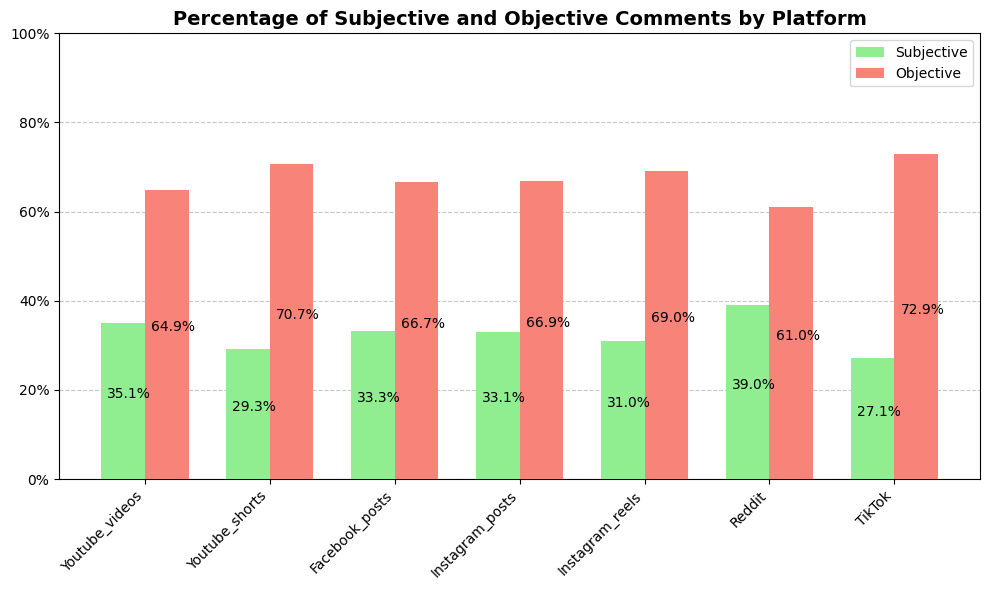

In [ ]:
def calculate_percentage(positive_count, negative_count):
    total = positive_count + negative_count
    if total == 0:
        return 0, 0
    positive_percentage = (positive_count / total) * 100
    negative_percentage = (negative_count / total) * 100
    return positive_percentage, negative_percentage

# Initialize lists to store platform names, positive percentages, and negative percentages
platform_names = []
positive_percentages = []
negative_percentages = []

# Iterate through the platforms dictionary
for platform, comments_df in platforms.items():
    positive_count = comments_df['sentiment_subjectivity'].value_counts().get('subjective', 0)
    negative_count = comments_df['sentiment_subjectivity'].value_counts().get('objective', 0)
    positive_percentage, negative_percentage = calculate_percentage(positive_count, negative_count)

    # Append platform name and percentages to respective lists
    platform_names.append(platform)
    positive_percentages.append(positive_percentage)
    negative_percentages.append(negative_percentage)

# Calculate the position for the bars
bar_width = 0.35
x = np.arange(len(platform_names))

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(x, positive_percentages, width=bar_width, color='lightgreen', label='Subjective', zorder=3)
plt.bar(x + bar_width, negative_percentages, width=bar_width, color='#F88379', label='Objective', zorder=3)

# Add text annotations for percentage values inside the bars
for i in range(len(platform_names)):
    plt.text(x[i] + 0.05, positive_percentages[i] / 2, f"{positive_percentages[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=10)
    plt.text(x[i] + 0.4, negative_percentages[i] / 2, f"{negative_percentages[i]:.1f}%", ha='center', va='bottom', color='black', fontsize=10)

# Add labels, title, and legend
plt.title('Percentage of Subjective and Objective Comments by Platform', fontsize=14, fontweight='bold')
plt.xticks(x + bar_width / 2, platform_names)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.legend()

plt.xticks(x + bar_width / 2, platform_names, rotation=45, ha='right')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

# Show plot
plt.tight_layout()
plt.show()

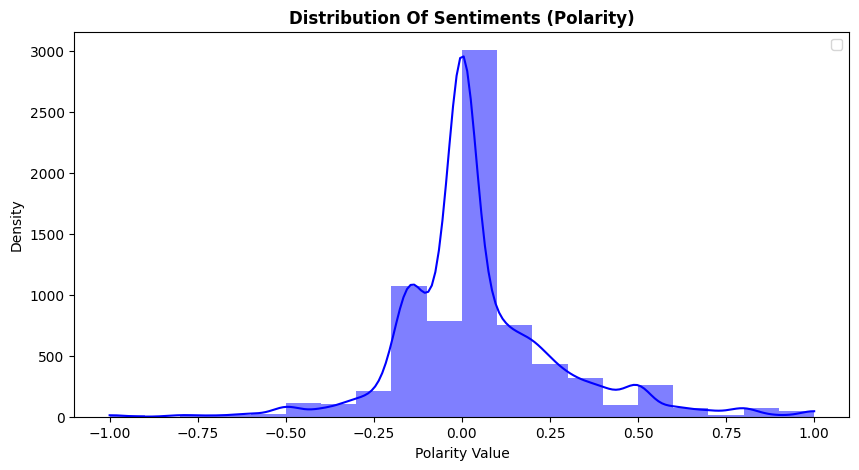

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution Of Sentiments (Polarity)',fontsize=12,fontweight='bold')
sns.histplot(comments['polarity'], bins=20, color='blue', alpha=0.5, kde=True, edgecolor='none')
# sns.kdeplot(comments['subjectivity'], label='Subjectivity', lw=2.5)
plt.xlabel('Polarity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

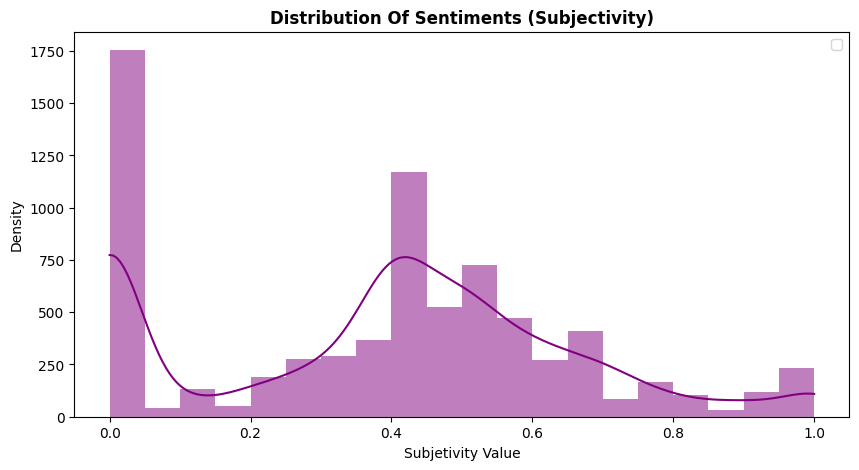

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Distribution Of Sentiments (Subjectivity)',fontsize=12,fontweight='bold')
# sns.kdeplot(comments['polarity'], label='Polarity', lw=2.5)
sns.histplot(comments['subjectivity'], bins=20, color='purple', alpha=0.5, kde=True, edgecolor='none')
plt.xlabel('Subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Display the generated image:

plt.legend()
plt.show()

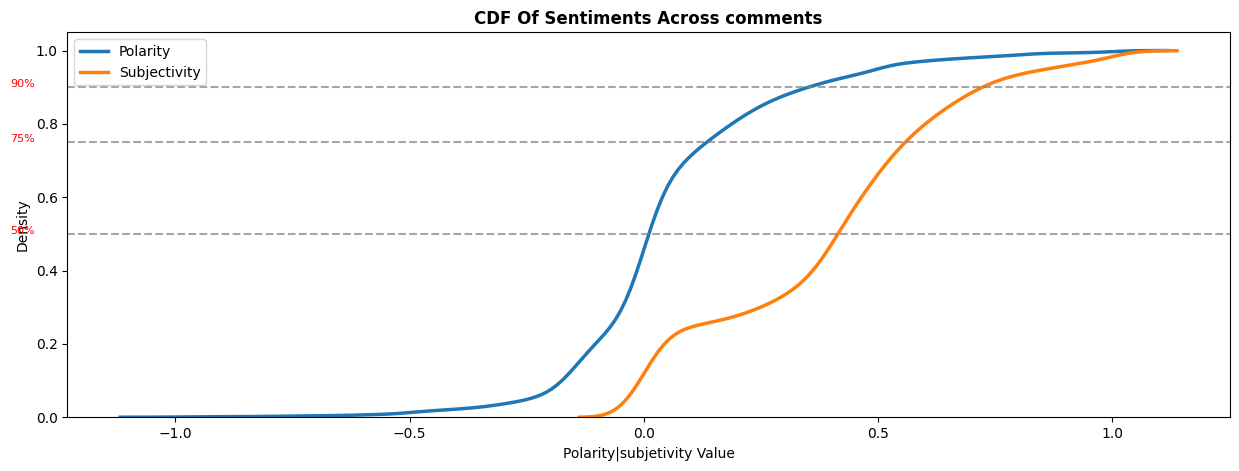

In [ ]:
plt.figure(figsize=(15,5))
plt.title('CDF Of Sentiments Across comments',fontsize=12, fontweight='bold')

# Plotting the CDFs
sns.kdeplot(comments['polarity'],cumulative=True, label='Polarity',lw=2.5)
sns.kdeplot(comments['subjectivity'],cumulative=True, label='Subjectivity',lw=2.5)

# Calculating percentiles
percentiles = [50, 75, 90]
for percentile in percentiles:
    percentile_value = np.percentile(np.arange(0, 1.01, 0.01), percentile)
    plt.axhline(y=percentile_value, linestyle='--', color='gray', alpha=0.7)
    plt.text(-1.3, percentile_value, f'{percentile}%', color='red', fontsize=8, ha='right')

plt.xlabel('Polarity|subjetivity Value', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

Positive correlation: subjective comments are more positive

Negative correlation: object comments are more positive

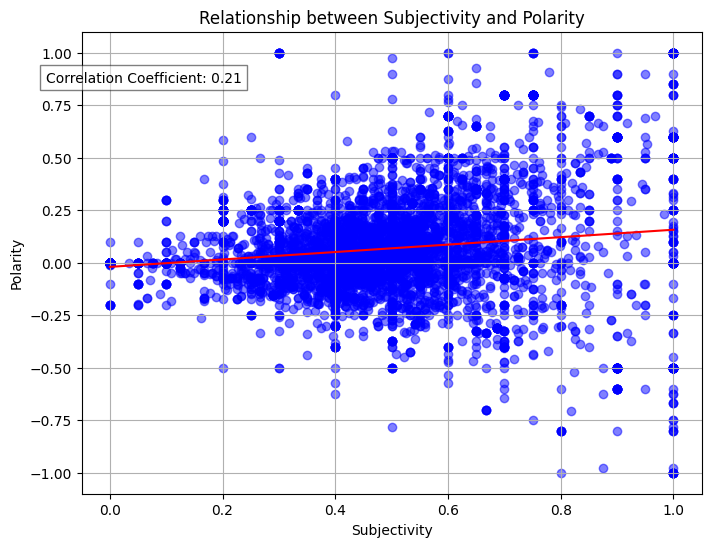

In [ ]:
plt.figure(figsize=(8, 6))

correlation_coefficient = np.corrcoef(comments['subjectivity'], comments['polarity'])[0, 1]

plt.scatter(comments['subjectivity'], comments['polarity'], color='blue', alpha=0.5)
plt.title('Relationship between Subjectivity and Polarity')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.grid(True)

# Add correlation line
plt.plot(np.unique(comments['subjectivity']),
         np.poly1d(np.polyfit(comments['subjectivity'], comments['polarity'], 1))
         (np.unique(comments['subjectivity'])), color='red')

# Add correlation coefficient to the plot
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [ ]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9, 1]

# Bin the polarity values
comments['polarity_bin'] = pd.cut(comments['polarity'], bins=bins)

# Calculate mean and standard deviation for each polarity bin
mean_polarity = comments.groupby('polarity_bin')['polarity'].mean()
std_polarity = comments.groupby('polarity_bin')['polarity'].std()

# Calculate the midpoints of the bins
bin_midpoints = [(bin.left + bin.right) / 2 for bin in mean_polarity.index]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
correlation_coefficient = np.corrcoef(comments['subjectivity'], comments['polarity'])[0, 1]
plt.scatter(comments['subjectivity'], comments['polarity'], color='blue', alpha=0.5)

# Plot mean and standard deviation bars
plt.errorbar(bin_midpoints, mean_polarity, yerr=std_polarity, fmt='o', color='red', markersize=10, capsize=5, label='Mean ± Standard Deviation')

plt.title('Relationship between Subjectivity and Polarity')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.grid(True)

# Add correlation line
plt.plot(np.unique(comments['subjectivity']),
         np.poly1d(np.polyfit(comments['subjectivity'], comments['polarity'], 1))
         (np.unique(comments['subjectivity'])), color='green', label='Correlation Line')

# Add correlation coefficient to the plot
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.show()

# Comment authors & dates

In [ ]:
cmap = cm.get_cmap('Spectral')

countries=comments['comment_author'].value_counts().sort_values(ascending=False)[:5].plot(
    kind = 'bar',
    cmap=cmap,
    edgecolor='None')

In [ ]:
# Only relevant for data with dates
# Sorting and feature engineering dates
comments = comments.sort_values(by='comment_time')
comments=comments.copy()
comments['comment_time'] = pd.to_datetime(comments['comment_time']).dt.date

comments['year']         = pd.DatetimeIndex(comments['comment_time']).year
comments['month']        = pd.DatetimeIndex(comments['comment_time']).month
comments['day']          = pd.DatetimeIndex(comments['comment_time']).day
comments['day_of_year']  = pd.DatetimeIndex(comments['comment_time']).dayofyear

comments

# Check top 5 most used hashtags (Only applicable for data with hashtags)

In [ ]:
MostUsedTags = comments.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'grey', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1)

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating the plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(MostUsedTags,
                                  autopct = lambda pct: func(pct, MostUsedTags),
                                  explode = explode,
                                  labels = MostUsedTags.keys(),
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, MostUsedTags.keys(),
          title ="Most used tags",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


plt.setp(autotexts, size=9, weight="bold")
ax.set_title("Most used tags")
plt.axis('equal')
plt.show()

# Top 10 posts countries (Only relevant for data with location)

In [ ]:
cmap = cm.get_cmap('Spectral')

countries=comments['user_location'].value_counts().sort_values(ascending=False)[:5].plot(
    kind = 'barh',
    cmap=cmap,
    edgecolor='None')

In [ ]:
import geopandas
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

ax = cities.plot()

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")